# Fault Diagnosis Toolbox in Python -- a development notebook

Erik Frisk<br>
<frisk@isy.liu.se><br>
Department of Electrical Engineering<br>
Linköping University<br>
Sweden

## Basic Python imports

In [1]:
##%matplotlib inline
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import sys
import numpy as np
import csv
import scipy.sparse as sp

## Fault Diagnosis Toolbox import

In [2]:
sys.path.append("faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/")
import faultdiagnosistoolbox as fdt

In [3]:
reload(fdt)
dir(fdt)

['CSCDict',
 'DMResult',
 'DiagnosisModel',
 'EqBlock',
 'GetDMParts',
 'PlotDM',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'dmperm',
 'np',
 'plt',
 'sa',
 'sp',
 'sprank']

## Some basic helper functions

In [4]:
def ReadMatrixCSV(fileName):
    with open(fileName, 'rt') as csvfile:
        matReader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        size = matReader.next() # Assume first line contains size information
        X=np.zeros((int(size[0]),int(size[1])),dtype='float64');
        for edge in matReader:
            X[int(edge[0]),int(edge[1])] = float(edge[2])
        return X

## Defining a diagnosis models -- structural information

In [5]:
modeldef = {}
modeldef['rels']= [['Ps', 'xf10', 'x', 'f4', 'f11', 'Fvc'],
    ['xh', 'x', 'f8'],
    ['Qv', 'f5', 'f1', 'xh', 'DeltaP'],
    ['DeltaP-a', 'xh', 'P1', 'Pv'],
    ['Pv', 'T1'],
    ['DeltaP', 'P1', 'P2', 'DeltaP-a'],
    ['Fvc', 'P1', 'xh', 'P2', 'DeltaP-a','Pv'],
    ['Qv3', 'x3', 'f18', 'P1', 'P2'],
    ['Qc', 'Ps', 'xh'],
    ['Qc', 'f9', 'Ps', 'xf10', 'CVI', 'Pz', 'f16'],
    ['Q', 'Qv', 'Qv3'],
    ['Yx', 'xh', 'f13'],
    ['YP1', 'P1'],
    ['YP2', 'P2'],
    ['T1', 'f7'],
    ['CVI', 'f12', 'Cv', 'Yx'],
    ['xf10', 'f10']]
modeldef['type'] = 'VarStruc'
modeldef['x'] = ['x', 'xh', 'Ps', 'P1', 'P2', 'Pz','Pv', 'DeltaP', 
    'DeltaP-a', 'Q', 'Qv', 'Qv3', 'Qc', 'T1', 'Fvc', 'xf10']
modeldef['f'] = ['f1', 'f4', 'f5', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 
    'f13', 'f16', 'f18']
modeldef['z'] = ['Yx', 'YP1', 'YP2', 'CVI', 'Cv', 'x3']
model=fdt.DiagnosisModel( modeldef )

In [6]:
print model.x
print model.X
print model.e

['x', 'xh', 'Ps', 'P1', 'P2', 'Pz', 'Pv', 'DeltaP', 'DeltaP-a', 'Q', 'Qv', 'Qv3', 'Qc', 'T1', 'Fvc', 'xf10']
[[ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1

<IPython.core.display.Javascript object>


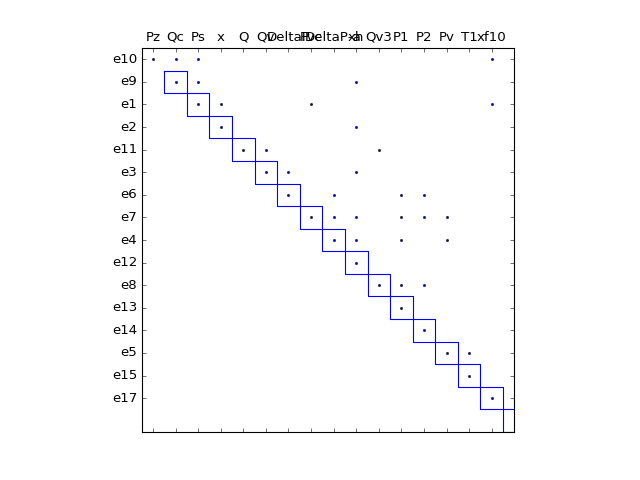

In [7]:
plt.figure(1)
model.PlotDM()
plt.show()

## Test some fundamental structural analysis operations

In [8]:
X=ReadMatrixCSV('Xengine.txt')
dm=fdt.GetDMParts(X)
print fdt.sprank(X)
print len(dm.M0)

278
6


<IPython.core.display.Javascript object>


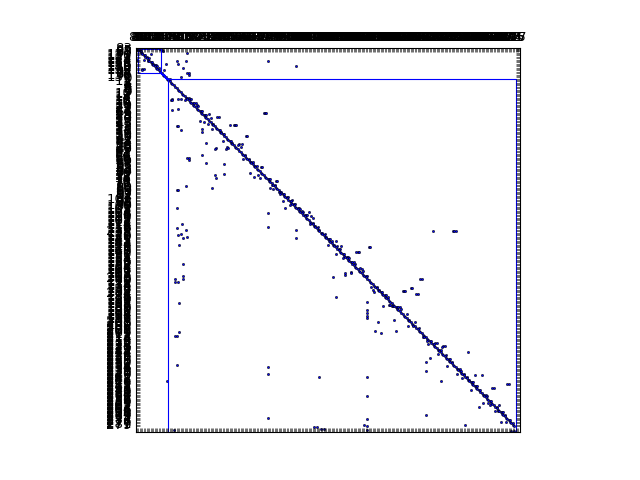

In [13]:
plt.figure(2)
fdt.PlotDM(X)
plt.xticks(np.arange(0,X.shape[0]),[np.str(i) for i in dm.colp])
plt.yticks(np.arange(0,X.shape[1]),[np.str(i) for i in dm.rowp])
plt.show()